In [1]:
!pip install geopandas matplotlib shapely cdsapi numpy xarray rioxarray netcdf4 scipy

In [2]:
import geopandas as gpd
import ast
import shapely
import numpy as np
import xarray as xr

In [ ]:
def convert_gee_geo(row):
    le = ast.literal_eval(row['.geo'])
    return shapely.Polygon(le['coordinates'][0])

def read_gsw_file(loc):
    df = gpd.read_file(loc)
    df.columns = ['system:index',
     'COAST',
     'DIST_MAIN',
     'DIST_SINK',
     'ENDO',
     'HYBAS_ID',
     'MAIN_BAS',
     'NEXT_DOWN',
     'NEXT_SINK',
     'ORDER',
     'PFAF_ID',
     'SORT',
     'SUB_AREA',
     'UP_AREA',
     'water_balance',
     '.geo',
     'geometry']
    df['SUB_AREA'] = df.SUB_AREA.apply(float)
    df['water_balance'] = df.water_balance.astype(float) * df.SUB_AREA
    df['.geo'] = df.apply(convert_gee_geo, axis=1)
    df.set_geometry('.geo', inplace=True)
    df.set_crs("EPSG:4326", inplace=True)

    return df

In [3]:
# df = gpd.read_file('data/diff_hb_2010.csv')
# # df.set_geometry('.geo', inplace=True)
# df.columns = ['system:index',
#  'COAST',
#  'DIST_MAIN',
#  'DIST_SINK',
#  'ENDO',
#  'HYBAS_ID',
#  'MAIN_BAS',
#  'NEXT_DOWN',
#  'NEXT_SINK',
#  'ORDER',
#  'PFAF_ID',
#  'SORT',
#  'SUB_AREA',
#  'UP_AREA',
#  'water_balance',
#  '.geo',
#  'geometry']
# df['SUB_AREA'] = df.SUB_AREA.apply(float)

# def convert_gee_geo(row):
#     le = ast.literal_eval(row['.geo'])
#     return shapely.Polygon(le['coordinates'][0])

# df['.geo'] = df.apply(convert_gee_geo, axis=1)
# df.set_geometry('.geo', inplace=True)
# df.set_crs("EPSG:4326", inplace=True)
# ''
df = read_gsw_file(loc='data/diff_hb_2010.csv')

''

In [4]:
# df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# df.head()

,system:index,COAST,DIST_MAIN,DIST_SINK,ENDO,HYBAS_ID,MAIN_BAS,NEXT_DOWN,NEXT_SINK,ORDER,PFAF_ID,SORT,SUB_AREA,UP_AREA,water_balance,.geo,geometry
0,000000000000000017e6,0,2331.1,2331.1,0,4060788280,4060025450,4060786650,4060025450,1,452973,1270,3752.1,109042.1,-4.3645418887584754E-4,"POLYGON ((89.08298 29.29755, 89.08368 29.29341...",None
1,000000000000000017e7,0,2413.2,2413.2,0,4060787190,4060025450,4060788280,4060025450,1,452975,1276,415.0,97861.7,-0.0034816855108332043,"POLYGON ((88.87860 29.47575, 88.87973 29.46446...",None
2,000000000000000017e8,0,2439.8,2439.8,0,4060787530,4060025450,4060787190,4060025450,1,452977,1278,3658.4,83214.7,-6.444749856863318E-4,"POLYGON ((88.24583 29.74583, 88.24619 29.73921...",None
3,000000000000000017e9,0,2497.1,2497.1,0,4060787180,4060025450,4060787530,4060025450,1,452979,1283,2983.2,74088.8,6.538828913250759E-5,"POLYGON ((87.86667 29.57083, 87.86723 29.55612...",None
4,000000000000000017ea,0,2554.1,2554.1,0,4060785160,4060025450,4060787180,4060025450,1,452991,1286,12286.5,51219.8,3.570443481052973E-4,"POLYGON ((85.17464 29.25171, 85.17535 29.24757...",None


In [6]:
df['water_balance'] = df.water_balance.astype(float) * df.SUB_AREA # 30m by 30m pixels / 

<Axes: >

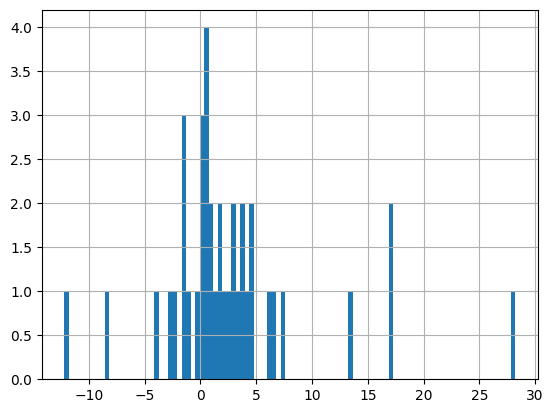

In [7]:
df.water_balance.hist(bins=100)

<Axes: >

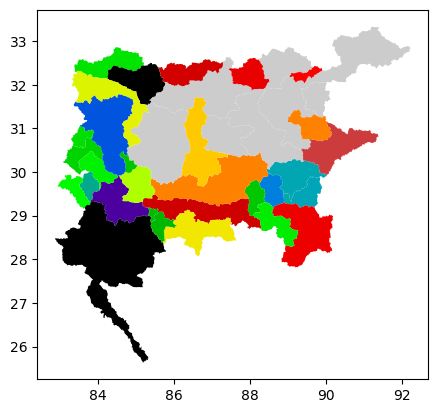

In [8]:
df.plot('water_balance', cmap='nipy_spectral', vmin=-5, vmax=5)


In [ ]:
downloaded = False

if downloaded == False:

    import cdsapi

    c = cdsapi.Client()

    years = np.arange(2000, 2022, 1)
    days = [
                '01', '02', '03',
                '04', '05', '06',
                '07', '08', '09',
                '10', '11', '12',
                '13', '14', '15',
                '16', '17', '18',
                '19', '20', '21',
                '22', '23', '24',
                '25', '26', '27',
                '28', '29', '30',
                '31',
            ]
    months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    times = '23:00'
    area = [45, 68, 24, 107]

    for year in years:
        year = str(year)
        c.retrieve('reanalysis-era5-land', {'year':year, 'month':months, 'time':times, 'day':days, 'area':area
                                           ,'variable':'total_precipitation', 'format':'netcdf.zip'}
                  ,'precip-'+year+'netcdf.zip')

# now we need to unzip the data
if downloaded == False:
    import glob
    import shutil
    for f in glob.glob('data/precip/*'):
        unzipped_filename = f.split('-')[1][0:4]
        shutil.unpack_archive(f, unzipped_filename)

2023-12-15 16:17:50,800 INFO Welcome to the CDS
2023-12-15 16:17:50,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-12-15 16:17:50,897 INFO Request is queued
2023-12-15 16:17:51,953 INFO Request is running
2023-12-15 16:19:44,775 INFO Request is completed
2023-12-15 16:19:44,779 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data1/adaptor.mars.internal-1702653546.1472669-15972-5-f346275e-fe55-43a9-b040-7188577a0b28.zip to precip-2000netcdf.zip (24.5M)
2023-12-15 16:19:54,926 INFO Download rate 2.4M/s                                                                  
2023-12-15 16:19:55,024 INFO Welcome to the CDS
2023-12-15 16:19:55,025 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-12-15 16:19:55,104 INFO Request is queued
2023-12-15 16:19:56,152 INFO Request is running
2023-12-15 16:21:48,976 INFO Request is completed
2023-12-15 16

In [67]:
precip2010 = xr.open_dataset('data/precip/2010data.nc')
precip2011 = xr.open_dataset('data/precip/2011data.nc')
precip = xr.concat([precip2010, precip2011], dim=['longitude', 'latitude'])
# precip = precip.rio.set_crs(df.crs)
precip = precip.rio.write_crs(df.crs)
means = [precip.rio.clip([poly], df.crs).tp.mean().item() for poly in df['.geo'].values]
stdev = [precip.rio.clip([poly], df.crs).tp.std().item() for poly in df['.geo'].values]

In [69]:
df['precip_means'] = means
df['precip_stdev'] = stdev

In [72]:
[c for c in df.columns]
cols = ['DIST_MAIN',
 'DIST_SINK',
 'ENDO',
 'SUB_AREA',
 'water_balance',
 'precip_means',
 'precip_stdev']

In [73]:
df[cols].corr()

,DIST_MAIN,DIST_SINK,ENDO,SUB_AREA,water_balance,precip_means,precip_stdev
DIST_MAIN,1.000000,0.951889,-0.897286,-0.213923,-0.342341,0.172375,0.116924
DIST_SINK,0.951889,1.000000,-0.947600,-0.163377,-0.322812,0.183438,0.140031
ENDO,-0.897286,-0.947600,1.000000,-0.002089,0.396147,-0.413402,-0.368460
SUB_AREA,-0.213923,-0.163377,-0.002089,1.000000,0.171883,0.614059,0.609010
water_balance,-0.342341,-0.322812,0.396147,0.171883,1.000000,-0.348371,-0.398678
precip_means,0.172375,0.183438,-0.413402,0.614059,-0.348371,1.000000,0.978998
precip_stdev,0.116924,0.140031,-0.368460,0.609010,-0.398678,0.978998,1.000000


In [74]:
df.shape

(39, 19)

<Axes: xlabel='precip_stdev', ylabel='water_balance'>

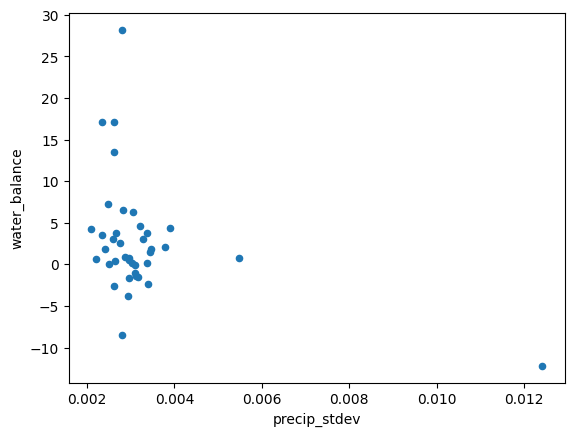

In [76]:
df.plot.scatter('precip_stdev', 'water_balance')

In [77]:
# time to add more data...